## 2.2.2 相対力指数：RSI

### コード2.11 RSI を求める対象データとして，銘柄 A0001 の 2012,2013 年のデータを選択する

In [2]:
import os
import numpy as np
import pandas as pd
os.makedirs('./output', exist_ok=True)

# 日次株価データを読み込み
stockDaily = pd.read_csv('./data/stockDaily.csv', parse_dates=['date'])
stockDaily['date'] = stockDaily['date'].dt.to_period('D')
stockDaily = stockDaily.set_index('date').sort_index()

# 日付を行ラベルに設定しラベルスライサで選択
df = stockDaily[stockDaily['ticker'] == 'A0001']
df = df.loc['2012':'2013', ['close']]
print(df)
# 本文に図として示されていない出力は，以下のようにコード内に結果を表示してる。
##             close
## date             
## 2012-01-04   1683
## 2012-01-05   1666
## ...           ...
## 2013-12-27   1196
## 2013-12-30   1195
## [493 rows x 1 columns]

            close
date             
2012-01-04   1683
2012-01-05   1666
2012-01-06   1655
2012-01-10   1668
2012-01-11   1667
...           ...
2013-12-24   1191
2013-12-25   1195
2013-12-26   1208
2013-12-27   1196
2013-12-30   1195

[493 rows x 1 columns]


### コード2.12 前日と当日の終値の差を計算する

In [7]:
ds = df.copy()
# close列の前行との差を計算
ds['diff'] = ds['close'].diff()
# 前日のない先頭行はNaNになるので削除する。
ds = ds.dropna(how='any')
# 差が0より大きい値のみ残し，他はNaNにした新しい列Uを作成する。
ds.loc[ds['diff'] > 0, 'U'] = ds['diff']
# 差が0より小さい値のみ残し，他はNoneにした新しい列Dを作成する。
ds.loc[ds['diff'] < 0, 'D'] = ds['diff'] * (-1)
print(ds)

            close   diff     U      D
date                                 
2012-01-05   1666  -17.0   NaN   17.0
2012-01-06   1655  -11.0   NaN   11.0
2012-01-10   1668   13.0  13.0    NaN
2012-01-11   1667   -1.0   NaN    1.0
2012-01-12   1658   -9.0   NaN    9.0
...           ...    ...   ...    ...
2013-12-24   1191 -144.0   NaN  144.0
2013-12-25   1195    4.0   4.0    NaN
2013-12-26   1208   13.0  13.0    NaN
2013-12-27   1196  -12.0   NaN   12.0
2013-12-30   1195   -1.0   NaN    1.0

[492 rows x 4 columns]


,close,diff,U,D
date,,,,
2012-01-05,1666,-17.0,NaN,17.0
2012-01-06,1655,-11.0,NaN,11.0
2012-01-10,1668,13.0,13.0,NaN
2012-01-11,1667,-1.0,NaN,1.0
2012-01-12,1658,-9.0,NaN,9.0


### コード2.13 RSI を計算するプログラム

In [30]:
# 移動平均の計算
ds['smaU'] = ds['U'].rolling(10,min_periods=1).mean().fillna(0.)
ds['smaD'] = ds['D'].rolling(10,min_periods=1).mean().fillna(0.)

# RSIの計算(式2.5)
ds['rsi'] = 100 * (ds['smaU'] / (ds['smaU'] + ds['smaD']))
print(ds)

            close   diff     U      D       smaU       smaD        rsi
date                                                                  
2012-01-05   1666  -17.0   NaN   17.0   0.000000  17.000000   0.000000
2012-01-06   1655  -11.0   NaN   11.0   0.000000  14.000000   0.000000
2012-01-10   1668   13.0  13.0    NaN  13.000000  14.000000  48.148148
2012-01-11   1667   -1.0   NaN    1.0  13.000000   9.666667  57.352941
2012-01-12   1658   -9.0   NaN    9.0  13.000000   9.500000  57.777778
...           ...    ...   ...    ...        ...        ...        ...
2013-12-24   1191 -144.0   NaN  144.0  11.666667  33.714286  25.708290
2013-12-25   1195    4.0   4.0    NaN   9.750000  36.833333  20.930233
2013-12-26   1208   13.0  13.0    NaN  10.400000  40.200000  20.553360
2013-12-27   1196  -12.0   NaN   12.0   8.750000  35.500000  19.774011
2013-12-30   1195   -1.0   NaN    1.0   8.750000  33.833333  20.547945

[492 rows x 7 columns]


,close,diff,U,D,smaU,smaD,rsi
date,,,,,,,
2012-01-05,1666,-17.0,NaN,17.0,0.000000,17.000000,0.000000
2012-01-06,1655,-11.0,NaN,11.0,0.000000,14.000000,0.000000
2012-01-10,1668,13.0,13.0,NaN,13.000000,14.000000,48.148148
2012-01-11,1667,-1.0,NaN,1.0,13.000000,9.666667,57.352941
2012-01-12,1658,-9.0,NaN,9.0,13.000000,9.500000,57.777778
...,...,...,...,...,...,...,...
2013-12-24,1191,-144.0,NaN,144.0,11.666667,33.714286,25.708290
2013-12-25,1195,4.0,4.0,NaN,9.750000,36.833333,20.930233
2013-12-26,1208,13.0,13.0,NaN,10.400000,40.200000,20.553360


### コード2.14 RSI と終値の折れ線チャートを描画するプログラム

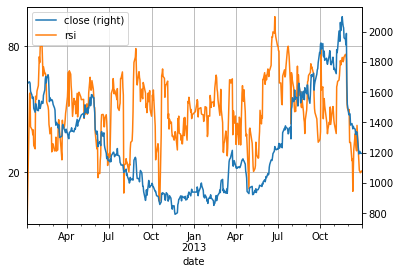

In [31]:
# 終値とRSIを折れ線チャートで描画
# 終値とRSIは単位が異なるので、終値を第２軸に設定する
# 売られすぎ/買われすぎの目安となるRSI=20,80をy軸の目盛としてグリッド線を描画
ax = ds[['close', 'rsi']].plot(
    secondary_y=['close'], yticks=[20, 80], grid=True)
ax.get_figure().savefig('./output/rsi.png')

### コード2.15 売られすぎ (RSI ≤ 20)，買われすぎ (RSI ≥ 80) の日を選択する

In [32]:
# 売られすぎ、買われすぎの日を選択する
overSold = ds[ds['rsi'] <= 20]
overBought = ds[ds['rsi'] >= 80]
print('### overSold ###')
print(overSold)
print('### overBought ###')
print(overBought)

### overSold ###
            close  diff     U     D       smaU       smaD        rsi
date                                                                
2012-01-05   1666 -17.0   NaN  17.0   0.000000  17.000000   0.000000
2012-01-06   1655 -11.0   NaN  11.0   0.000000  14.000000   0.000000
2012-06-07   1240 -81.0   NaN  81.0  11.000000  52.142857  17.420814
2012-06-08   1256  16.0  16.0   NaN  12.666667  52.142857  19.544453
2012-06-11   1273  17.0  17.0   NaN  13.750000  57.166667  19.388954
2012-08-02   1069 -23.0   NaN  23.0   2.000000  17.777778  10.112360
2012-10-17    884 -22.0   NaN  22.0   1.000000  14.250000   6.557377
2012-10-18    872 -12.0   NaN  12.0   1.000000  15.000000   6.250000
2012-10-19    857 -15.0   NaN  15.0   1.000000  14.750000   6.349206
2013-04-30    929 -14.0   NaN  14.0   4.000000  28.750000  12.213740
2013-12-11   1357 -20.0   NaN  20.0  10.000000  81.375000  10.943912
2013-12-27   1196 -12.0   NaN  12.0   8.750000  35.500000  19.774011
### overBought ##

,close,diff,U,D,smaU,smaD,rsi
date,,,,,,,
2012-01-05,1666,-17.0,NaN,17.0,0.000000,17.000000,0.000000
2012-01-06,1655,-11.0,NaN,11.0,0.000000,14.000000,0.000000
2012-06-07,1240,-81.0,NaN,81.0,11.000000,52.142857,17.420814
2012-06-08,1256,16.0,16.0,NaN,12.666667,52.142857,19.544453
2012-06-11,1273,17.0,17.0,NaN,13.750000,57.166667,19.388954
2012-08-02,1069,-23.0,NaN,23.0,2.000000,17.777778,10.112360
2012-10-17,884,-22.0,NaN,22.0,1.000000,14.250000,6.557377
2012-10-18,872,-12.0,NaN,12.0,1.000000,15.000000,6.250000
2012-10-19,857,-15.0,NaN,15.0,1.000000,14.750000,6.349206


,close,diff,U,D,smaU,smaD,rsi
date,,,,,,,
2012-02-07,1525,-14.0,NaN,14.0,58.000000,14.375000,80.138169
2013-06-18,1150,-1.0,NaN,1.0,22.714286,5.333333,80.984720
2013-06-19,1148,-2.0,NaN,2.0,24.500000,4.500000,84.482759
2013-06-20,1168,20.0,20.0,NaN,24.000000,4.500000,84.210526
2013-06-21,1193,25.0,25.0,NaN,24.142857,3.666667,86.815068
2013-06-24,1210,17.0,17.0,NaN,22.857143,3.666667,86.175943
2013-06-25,1240,30.0,30.0,NaN,23.750000,1.500000,94.059406
2013-06-26,1231,-9.0,NaN,9.0,26.285714,4.000000,86.792453
2013-06-27,1226,-5.0,NaN,5.0,23.333333,4.250000,84.592145
